In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [3]:
avg_scale_analyse = pd.read_csv('scale_analysis_cross_entropy.csv', index_col=0).iloc[:4, :5].astype(float)
avg_scale_analyse.index = [
    'nnUNet 3D (Genesis)',
    'nnUNet 3D (CLIP Pre-&Post-IVL)',
    'nnUNet 3D (LaW OCT)',
    'nnUNet 3D',
]
avg_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D (Genesis),0.097853,0.074608,0.059826,0.088807,0.049734
nnUNet 3D (CLIP Pre-&Post-IVL),0.108117,0.071680,0.056225,0.088623,0.052512
nnUNet 3D (LaW OCT),0.082145,0.069594,0.059133,0.074541,0.049158
nnUNet 3D,0.106661,0.106374,0.060031,0.089518,0.054706


In [4]:
std_scale_analyse = pd.read_csv('scale_analysis_cross_entropy.csv', index_col=0).iloc[6:10, :5].astype(float)
std_scale_analyse.index = [
    'nnUNet 3D (Genesis)',
    'nnUNet 3D (CLIP Pre-&Post-IVL)',
    'nnUNet 3D (LaW OCT)',
    'nnUNet 3D',
]
std_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D (Genesis),0.005309,0.009805,0.004443,0.027621,0.003343
nnUNet 3D (CLIP Pre-&Post-IVL),0.016343,0.016424,0.005523,0.026031,0.005729
nnUNet 3D (LaW OCT),0.007561,0.012088,0.006477,0.023227,0.000226
nnUNet 3D,0.012283,0.046694,0.010394,0.024256,0.004554


In [6]:
avg_scale_analyse.iloc[0, :]

33%     0.097853
50%     0.074608
66%     0.059826
83%     0.088807
100%    0.049734
Name: nnUNet 3D (Genesis), dtype: float64

In [7]:
std_scale_analyse.iloc[0, :].to_numpy()

array([0.00530925, 0.00980529, 0.00444339, 0.02762091, 0.0033428 ])

In [39]:
cmap = mpl.colormaps['twilight_shifted']

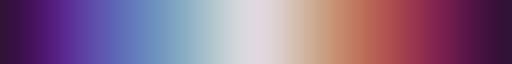

In [9]:
cmap

In [10]:
colors[0]

C:\Users\Namka\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\basic.py:345: UserWarning: Error changing shell color schemes.
The 'colors' trait of a ZMQInteractiveShell instance expected any of ['Neutral', 'NoColor', 'LightBG', 'Linux'] (case-insensitive), not the str '[0]'.
  color_switch_err('shell')
C:\Users\Namka\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\basic.py:352: UserWarning: Error changing exception color schemes.
Unrecognized color scheme: [0]
Valid schemes: ['NoColor', 'Linux', 'LightBG', 'Neutral', '']
  color_switch_err('exception')
C:\Users\Namka\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\basic.py:359: UserWarning: Error changing object inspector color schemes.
Unrecognized color scheme: [0]
Valid schemes: ['NoColor', 'Linux', 'LightBG', 'Neutral', '']
  color_switch_err('object inspector')


In [11]:
cmap.N

510

In [12]:
for i in range(0, cmap.N, cmap.N//4):
    print(i)

0
127
254
381
508


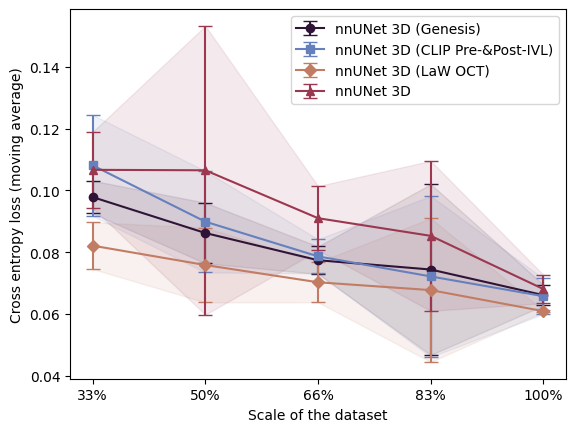

In [13]:
fig, ax = plt.subplots()

ranges = range(0, 220, 220//len(avg_scale_analyse))
ranges = [0, 137, 350, 411]
colors = [cmap(i) for i in ranges]
alpha = 0.10
markers = ['o', 's', 'D', '^']

for i in range(len(avg_scale_analyse)):
    data = avg_scale_analyse.iloc[i, :]
    moving_avg = data.rolling(min_periods=1, window=3).mean()

    ax.errorbar(avg_scale_analyse.columns, moving_avg, yerr=std_scale_analyse.iloc[i, :], label=avg_scale_analyse.iloc[i, :].name, marker=markers[i], capsize=5, color=colors[i])
    ax.fill_between(avg_scale_analyse.columns, moving_avg - std_scale_analyse.iloc[i, :], moving_avg + std_scale_analyse.iloc[i, :], alpha=alpha, color=colors[i])

ax.set_xlabel('Scale of the dataset')
ax.set_ylabel('Cross entropy loss (moving average)')

ax.legend(loc='upper right') # , bbox_to_anchor=(1.2, 1)

fig.savefig('discussion_cross_entropy_scale_analysis.png', dpi=1000, bbox_inches='tight')
plt.show()

In [6]:
avg_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D (Genesis),0.097853,0.074608,0.059826,0.088807,0.049734
nnUNet 3D (CLIP Pre-&Post-IVL),0.108117,0.071680,0.056225,0.088623,0.052512
nnUNet 3D (LaW OCT),0.082145,0.069594,0.059133,0.074541,0.049158
nnUNet 3D,0.106661,0.106374,0.060031,0.089518,0.054706


In [33]:
x + width

array([0.25, 1.25, 2.25, 3.25, 4.25])

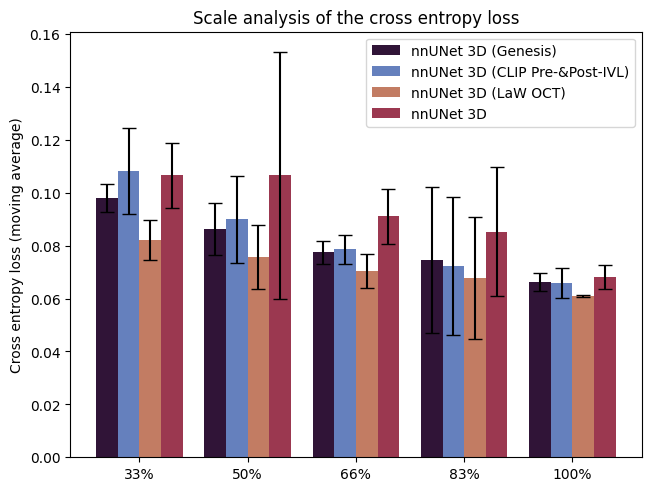

In [42]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

ranges = [0, 137, 350, 411]
colors = [cmap(i) for i in ranges]


x = np.arange(len(avg_scale_analyse.columns))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for i in range(len(avg_scale_analyse)):
    data = avg_scale_analyse.iloc[i, :]
    moving_avg = data.rolling(min_periods=1, window=3).mean()

    ax.bar(x + width*multiplier, moving_avg, width, 
        yerr=std_scale_analyse.iloc[i, :], capsize=5,
        label=avg_scale_analyse.iloc[i, :].name, color=colors[i])
    multiplier += 1



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cross entropy loss (moving average)')
ax.set_title('Scale analysis of the cross entropy loss')
ax.set_xticks(x + 1.5 * width, avg_scale_analyse.columns)
ax.legend(loc='upper right', ncols=1)

plt.show()